In [1]:
from dlc_practical_prologue import *
from utils import *
import torch
import torch.nn as nn

In [2]:
train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)

In [3]:
# Model which takes the 2*14*14 images and simply returns 2 logits for prediction
class Model1(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.activation = nn.ReLU()
        
        self.conv1 = nn.Conv2d(in_channels = 2, out_channels=4, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels = 4, out_channels=8, kernel_size=3)
        
        self.fcout = nn.Linear(8*10*10, 2)
        
        
        
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.fcout(x.view(x.size(0), -1))
        
        return x

In [4]:
# Here I define a model to predict a digit from an 1*14*14 image
class ConvNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.activation = nn.ReLU()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3)
        
        self.fcout = nn.Linear(16*8*8, 10)
        
    def forward(self, x):
        
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.activation(self.conv3(x))
        
        return self.fcout(x.view(x.size(0), -1))
    
# Then I use this model to make a bigger model predicting the 2 digits, and I concatenate the output
class Model2(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.convnet1 = ConvNet()
        self.convnet2 = ConvNet()
        
    def forward(self, x):
        
        digit1 = x[:,0,:,:].unsqueeze(1)
        digit2 = x[:,1,:,:].unsqueeze(1)
        
        return torch.cat([self.convnet1(digit1).unsqueeze(1), self.convnet2(digit2).unsqueeze(1)], dim = 1)
    
# Finaly we need a loss that computes the losses for the two digits, and I simply add them up.    
class Double_CrossEntropy(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.criterion = nn.CrossEntropyLoss()
        
    def forward(self, input, target):
        
        digit1_classes = target[:,0]
        digit2_classes = target[:,1]
        
        digit1_logits = input[:,0,:]
        digit2_logits = input[:,1,:]
        
        return self.criterion(digit1_logits, digit1_classes) + self.criterion(digit2_logits, digit2_classes)
        

In [5]:
model = Model1()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [6]:
metrics = many_trains(Model1, criterion, optimizer, train_input, train_target, train_classes,
                      test_input, test_target, test_classes,
                      mini_batch_size = 100, output_type='target', num_trains=10, epochs = 25)

Training 1: Final accuracy: 71.60%, Best Accuracy: 71.80%
Training 2: Final accuracy: 72.70%, Best Accuracy: 72.70%
Training 3: Final accuracy: 72.10%, Best Accuracy: 72.10%
Training 4: Final accuracy: 73.60%, Best Accuracy: 73.60%
Training 5: Final accuracy: 69.30%, Best Accuracy: 69.70%
Training 6: Final accuracy: 71.60%, Best Accuracy: 71.70%
Training 7: Final accuracy: 74.00%, Best Accuracy: 74.50%
Training 8: Final accuracy: 71.70%, Best Accuracy: 71.70%
Training 9: Final accuracy: 72.30%, Best Accuracy: 72.50%
Training 10: Final accuracy: 72.60%, Best Accuracy: 72.60%


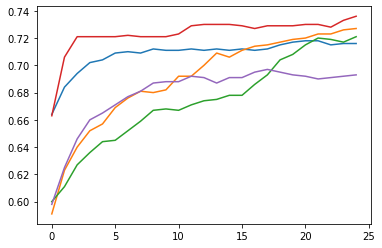

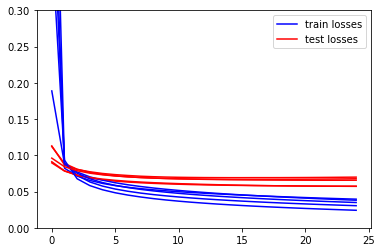

In [7]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot(metrics.accuracies[i])
plt.show()

for i in range(5):
    plt.plot(metrics.train_losses[i], color = 'b')
    plt.plot(metrics.test_losses[i], color = 'r')
    plt.ylim(0.0, 0.3)
    plt.legend(['train losses', 'test losses'])

In [8]:
model = Model2()
criterion = Double_CrossEntropy()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [9]:
metrics = many_trains(Model2, criterion, optimizer, train_input, train_target, train_classes,
                      test_input, test_target, test_classes,
                      mini_batch_size = 100, output_type='classes', num_trains=10, epochs = 25)

Training 1: Final accuracy: 90.50%, Best Accuracy: 90.60%
Training 2: Final accuracy: 88.60%, Best Accuracy: 88.60%
Training 3: Final accuracy: 91.00%, Best Accuracy: 91.00%
Training 4: Final accuracy: 91.90%, Best Accuracy: 91.90%
Training 5: Final accuracy: 90.00%, Best Accuracy: 90.10%
Training 6: Final accuracy: 91.60%, Best Accuracy: 91.60%
Training 7: Final accuracy: 91.80%, Best Accuracy: 91.80%
Training 8: Final accuracy: 91.80%, Best Accuracy: 91.80%
Training 9: Final accuracy: 90.80%, Best Accuracy: 90.80%
Training 10: Final accuracy: 92.50%, Best Accuracy: 92.60%


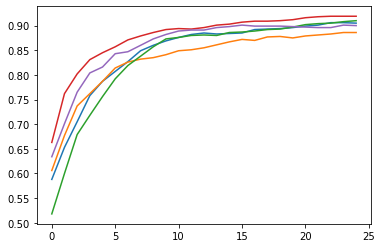

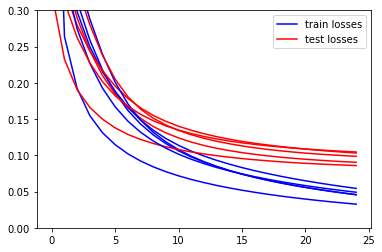

In [10]:
for i in range(5):
    plt.plot(metrics.accuracies[i])
plt.show()

for i in range(5):
    plt.plot(metrics.train_losses[i], color = 'b')
    plt.plot(metrics.test_losses[i], color = 'r')
    plt.ylim(0.0, 0.3)
    plt.legend(['train losses', 'test losses'])